In [27]:
'''
Classification - Iris data set from https://archive.ics.uci.edu/ml/datasets/Iris
Last Updated : 03/30/2019, by Hyungmin Jun (hyungminjun@outlook.com)

=============================================================================

Classification using Keras
Copyright 2019 Hyungmin Jun. All rights reserved.

License - GPL version 3
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or any later version. This
program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program. If not, see <http://www.gnu.org/licenses/>.
'''

'\nClassification - Iris data set from https://archive.ics.uci.edu/ml/datasets/Iris\nLast Updated : 03/30/2019, by Hyungmin Jun (hyungminjun@outlook.com)\n\n=============================================================================\n\nClassification using Keras\nCopyright 2019 Hyungmin Jun. All rights reserved.\n\nLicense - GPL version 3\nThis program is free software: you can redistribute it and/or modify it under\nthe terms of the GNU General Public License as published by the Free Software\nFoundation, either version 3 of the License, or any later version. This\nprogram is distributed in the hope that it will be useful, but WITHOUT ANY\nWARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR\nA PARTICULAR PURPOSE. See the GNU General Public License for more details.\nYou should have received a copy of the GNU General Public License along with\nthis program. If not, see <http://www.gnu.org/licenses/>.\n'

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

%matplotlib inline

In [29]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
#df.head()

renames = ['len1', 'width1', 'len2', 'width2', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', index_col = False, names = renames)
df.count()
df.head(10)

,len1,width1,len2,width2,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
df.describe()

,len1,width1,len2,width2
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
y = LabelEncoder().fit_transform(df['class'])

In [32]:
y = to_categorical(y)

In [33]:
x = df.drop('class', axis = 1)
x.head()

,len1,width1,len2,width2
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
x_train = x[:-5]
x_test  = x[-5:]

y_train = y[:-5]
y_test  = y[-5:]

model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(3,   activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=50, validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________
Train on 130 samples, validate on 15 samples
Epoch 1/50
130/130 [==============================] - 1s 6ms/step - loss: 1.0398 - acc: 0.3615 - val_loss: 1.6530 - val_acc: 0.0000e+00
Epoch 2/50
130/130 [==============================] - 0s 84us/step - loss: 0.9201 - acc: 

Text(0.5, 1.0, 'accuracy')

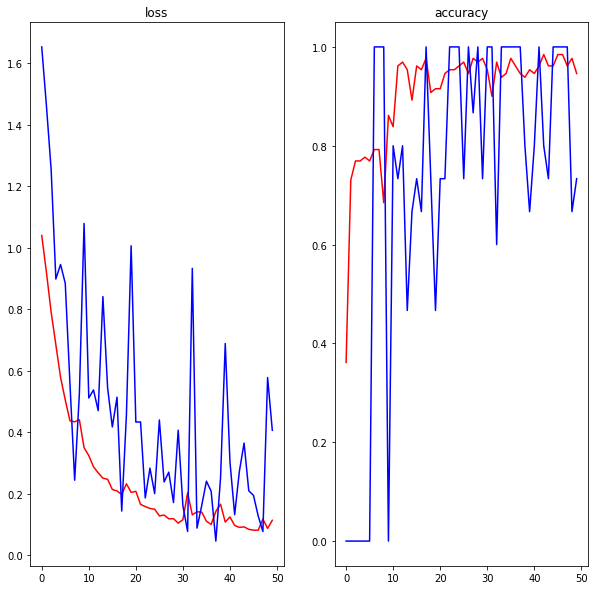

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('accuracy')

In [36]:
score = model.evaluate(x_test, y_test)
print(score)

pred = model.predict(x_test)
print(pred)
print(y_test)

5/5 [==============================] - 0s 200us/step
[0.27922892570495605, 1.0]
[[3.7938854e-04 2.4155301e-01 7.5806761e-01]
 [4.6979601e-04 2.0222433e-01 7.9730588e-01]
 [5.6782551e-04 3.7845296e-01 6.2097919e-01]
 [2.6757678e-04 9.5636450e-02 9.0409595e-01]
 [7.1361969e-04 2.6976570e-01 7.2952068e-01]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
